In [24]:
import optuna
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_contour

import matplotlib.pyplot as plt

In [25]:
db_endopoint = 'astromer.c1hqeh36ya5n.us-east-1.rds.amazonaws.com'
db = 'hp'
connection = 'mysql://root:abcdabcd@{}:3306/{}'.format(db_endopoint, 
                                                       db)
loaded_study = optuna.load_study(study_name="astromer_hp", 
                                 storage=connection)

/tmp/ipykernel_306/3516289582.py:1: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  ax = plot_parallel_coordinate(loaded_study,


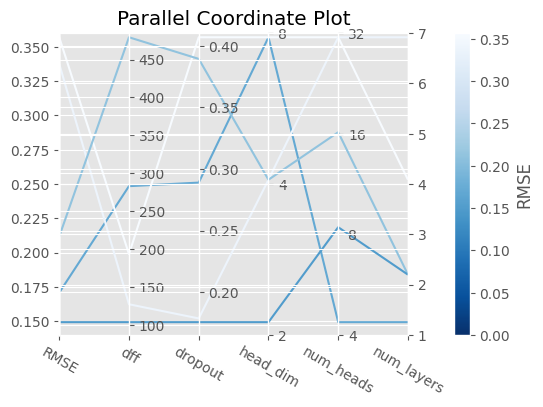

In [26]:
ax = plot_parallel_coordinate(loaded_study, 
                              target=lambda t: t.values[0], 
                              target_name='RMSE',
                        )
ax.set_ylim(0.14, 0.36)
ax.figure.set_dpi(100)

/tmp/ipykernel_306/2255744383.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  ax = plot_param_importances(loaded_study, target=lambda t: t.values[0], target_name='RMSE')


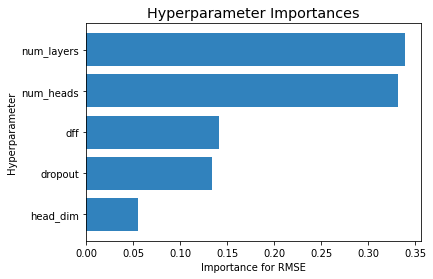

In [5]:
ax = plot_param_importances(loaded_study, target=lambda t: t.values[0], target_name='RMSE')

/tmp/ipykernel_306/3580800276.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  axes = plot_contour(loaded_study,
[W 2022-08-11 19:59:54,353] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


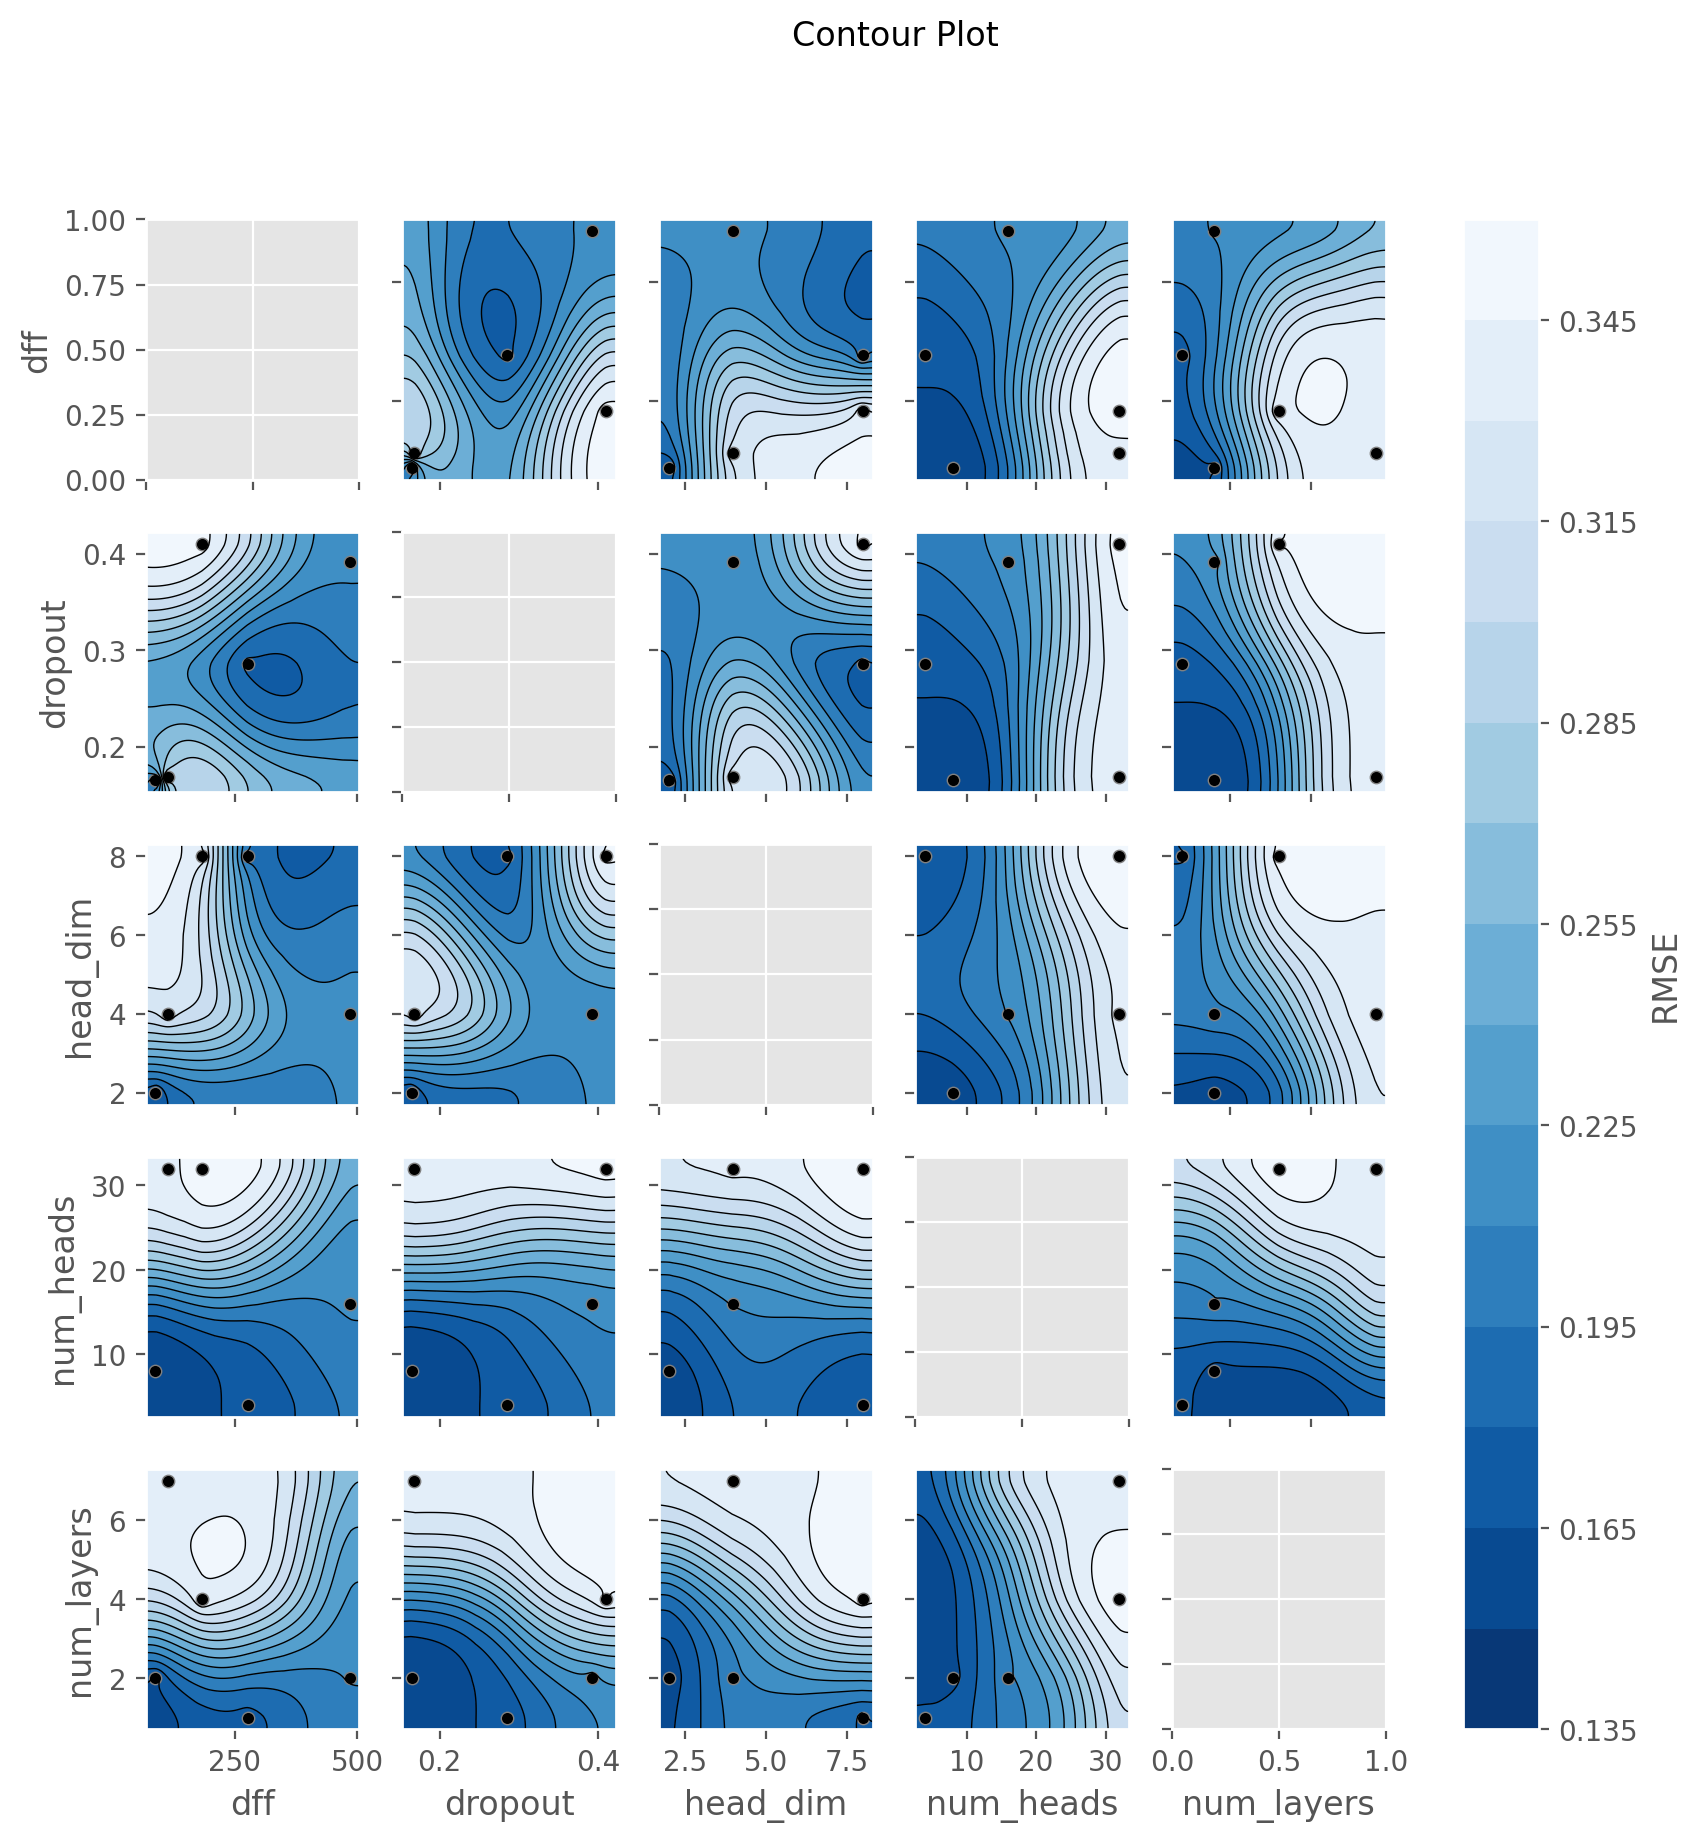

In [23]:
axes = plot_contour(loaded_study, 
                    target=lambda t: t.values[0], target_name='RMSE',
                    )
axes[0][0].figure.set_size_inches(10,10)
axes[0][0].figure.set_dpi(200)